# Classificador de pneus normais ou rachados

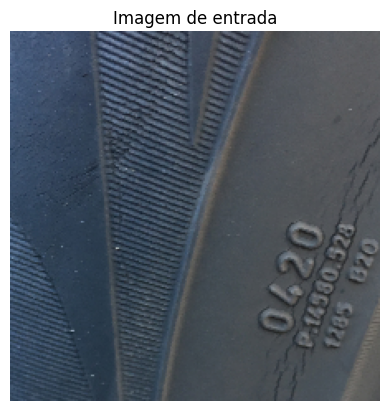

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Predição: rachado (probabilidade: 0.82)


In [15]:
import numpy as np
import os  # Diretórios
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt



model_path = 'modelo_tires.h5'
model = load_model(model_path)

base_dir = 'tire_textures/testing_data'
image_path = os.path.join(base_dir, 'cracked/IMG_4415.jpg')  # Bota aqui a imagem
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)

# Exibe a imagem
plt.imshow(np.array(img))
plt.title("Imagem de entrada")
plt.axis('off')
plt.show()

# Normaliza os pixels para o intervalo [0,1]
img_array = img_array / 255.0

# Expande as dimensões para formar um batch (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Faz a predição
predicao = model.predict(img_array)

# 0.5 é um limiar para classificação binária
if predicao[0][0] > 0.5:
    resultado = "rachado"
else:
    resultado = "normal"

print(f"Predição: {resultado} (probabilidade: {predicao[0][0]:.2f})")


# Classificador de pacientes com ou sem pneumonia

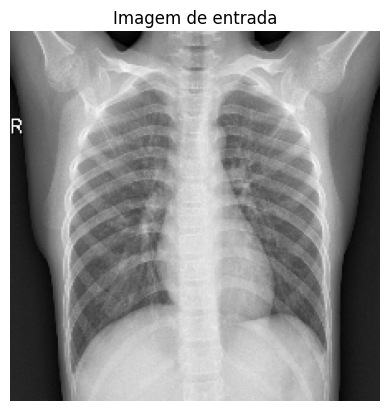

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Predição: normal (probabilidade: 0.21)


In [7]:
# Importação das bibliotecas necessárias
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

model_path = 'modelo_pneumonia.h5'
model = load_model(model_path)

base_dir = 'chest_xray/test'
image_path = os.path.join(base_dir, 'NORMAL/IM-0089-0001.jpeg')
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)

plt.imshow(np.array(img))
plt.title("Imagem de entrada")
plt.axis('off')
plt.show()


img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

predicao = model.predict(img_array)

if predicao[0][0] > 0.5:
    resultado = "pneumonia"
else:
    resultado = "normal"

print(f"Predição: {resultado} (probabilidade: {predicao[0][0]:.2f})")
